In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0,'..')
from food.psql import *
from food.paths import *
from mytools.tools import *

import pandas as pd
from PIL import Image

from food.search import *
from mytools.psql import *
from mytools.visual import visualize_array

dev
Since no pretrained weights have been provided, we load the reference pretrained DINO weights.


/home/dima/anaconda3/envs/f4/lib/python3.9/site-packages/torchmetrics/utilities/prints.py:36: UserWarning: Torchmetrics v0.9 introduced a new argument class property called `full_state_update` that has
                not been set for this class (UnsupervisedMetrics). The property determines if `update` by
                default needs access to the full metric state. If this is not the case, significant speedups can be
                achieved and we recommend setting this to `False`.
                We provide an checking function
                `from torchmetrics.utilities import check_forward_no_full_state`
                that can be used to check if the `full_state_update=True` (old and potential slower behaviour,
                default for now) or if `full_state_update=False` can be used safely.
                
  warnings.warn(*args, **kwargs)


/home/dima/FoodSeg103-Benchmark-v1/checkpoints/SETR_Naive_ReLeM


/home/dima/FoodSeg103-Benchmark-v1/mmseg/models/builder.py:59: UserWarning: train_cfg and test_cfg is deprecated, please specify them in model
  warnings.warn(


load pre-trained weight from imagenet21k


/home/dima/mytools/mytools/visual.py:24: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  series2tensor = lambda series:torch.tensor([np.array(c) for c in series.values])


In [3]:
df = pd.read_sql('select * from food.dishes',engine)
photo_ids = df[df['user_id']==78882798]['photo_id'].drop_duplicates().tolist()

In [124]:
n+=1

In [15]:
n=0

In [17]:
n-=1
print(n)

-2


In [32]:
search

dev


<function food.search.search(url, prompt_factor=0.5, min_score=0.22, exand_times=2)>

In [71]:
photo_id = photo_ids[n]
url = f'https://dima.grankin.eu/reference_images/{photo_id}'

# q = f"""select f.*, d.area,d.score
#    from food.foods f 
#    join food.dishes d on (d.food_id = f.id)
#    where d.photo_id = '{photo_id}' 
#    order by d.area desc"""

# df = pd.read_sql(q,engine);df

# output = '; '.join(df['description'].tolist())

img,clip_df,masks,urls,stats = search(url,prompt_factor=0.3,min_score=0.22,exand_times=5)
clip_df

dev


/home/dima/anaconda3/envs/f4/lib/python3.9/site-packages/torch/nn/functional.py:3509: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")
/home/dima/anaconda3/envs/f4/lib/python3.9/site-packages/torch/nn/functional.py:3679: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn(
/home/dima/anaconda3/envs/f4/lib/python3.9/site-packages/torchvision/transforms/transforms.py:287: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  warnings.warn(
/home/dima/anaconda3/envs/f

ValueError: Length of values (11) does not match length of index (110)

In [70]:
urls[3]

'https://dima.grankin.eu/fragment_reference_images/AgACAgIAAxkBAAIL92LxLgNRlXNZ21MEyGXB6Bgh7VgTAAL0vjEbfXeISyKFJckpKVl7AQADAgADeQADKQQ_48.jpg'

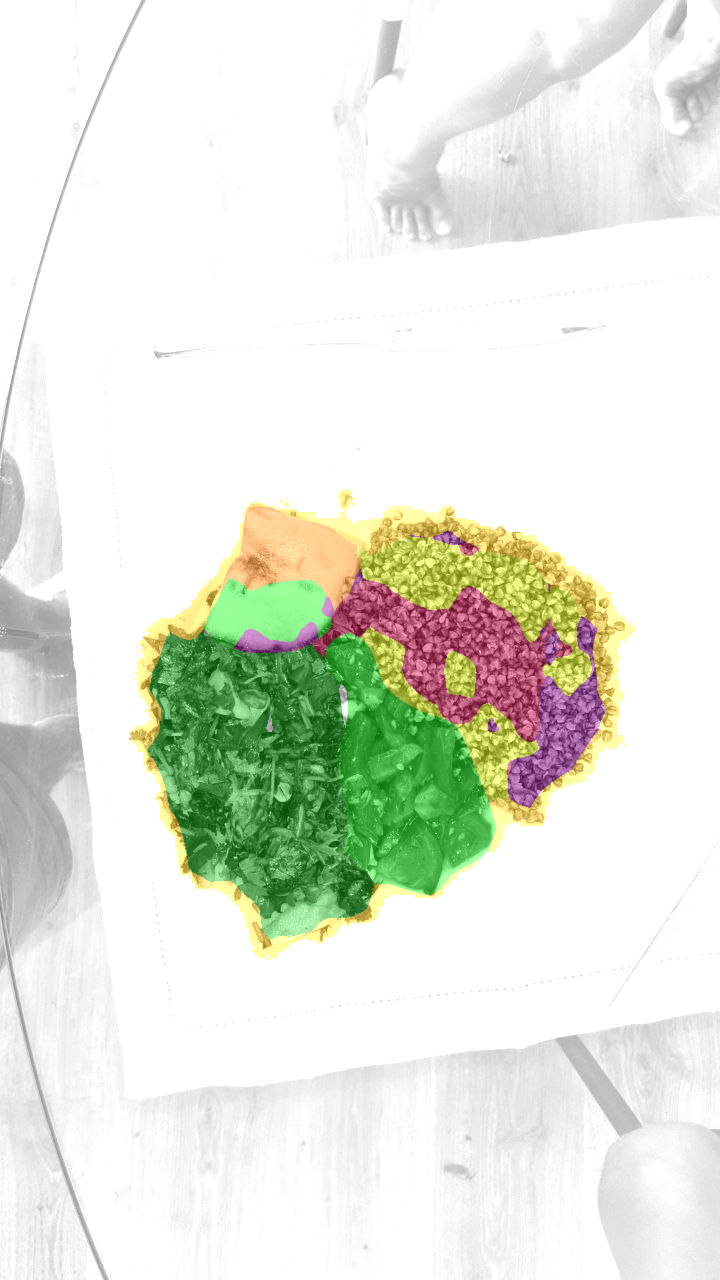

In [69]:
img

In [47]:
from mytools.visual import *

In [48]:
search_clip(url,foods,food_clips)[1]

,id,description,category,energy,protein,carb,fat,text,clip,score
0,1101538,"Buckwheat groats, fat added","Pasta, noodles, cooked grains",112.0,3.22,18.99,3.34,"the food is pasta, noodles, cooked grains . it...","[0.033298783, -0.008431105, 0.022476165, 0.043...",0.24042


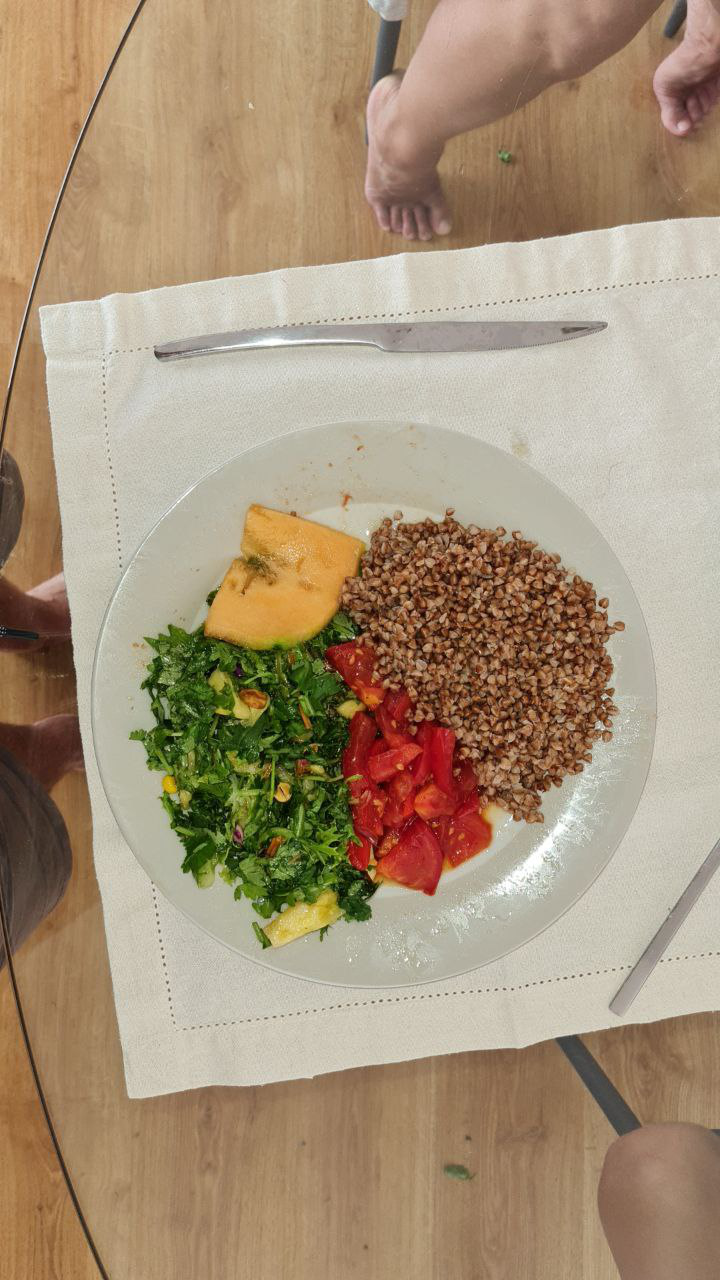

In [23]:
get_image_from_url(f'https://dima.grankin.eu/reference_images/{photo_id}')

In [39]:
urls[0]

'https://dima.grankin.eu/fragment_reference_images/AgACAgIAAxkBAAILgWLufXxIlZvR5-IdojOl4vWZegbyAAKCvjEb0nR4S01_68iRU3fzAQADAgADeQADKQQ_10.jpg'

In [115]:
urls[1]

'https://dima.grankin.eu/fragment_reference_images/AgACAgIAAxkBAAILjWLul82rsew53t9PsBIB1Jyx9c3WAALmvjEb0nR4S2e00vrM98twAQADAgADeQADKQQ_26.jpg'

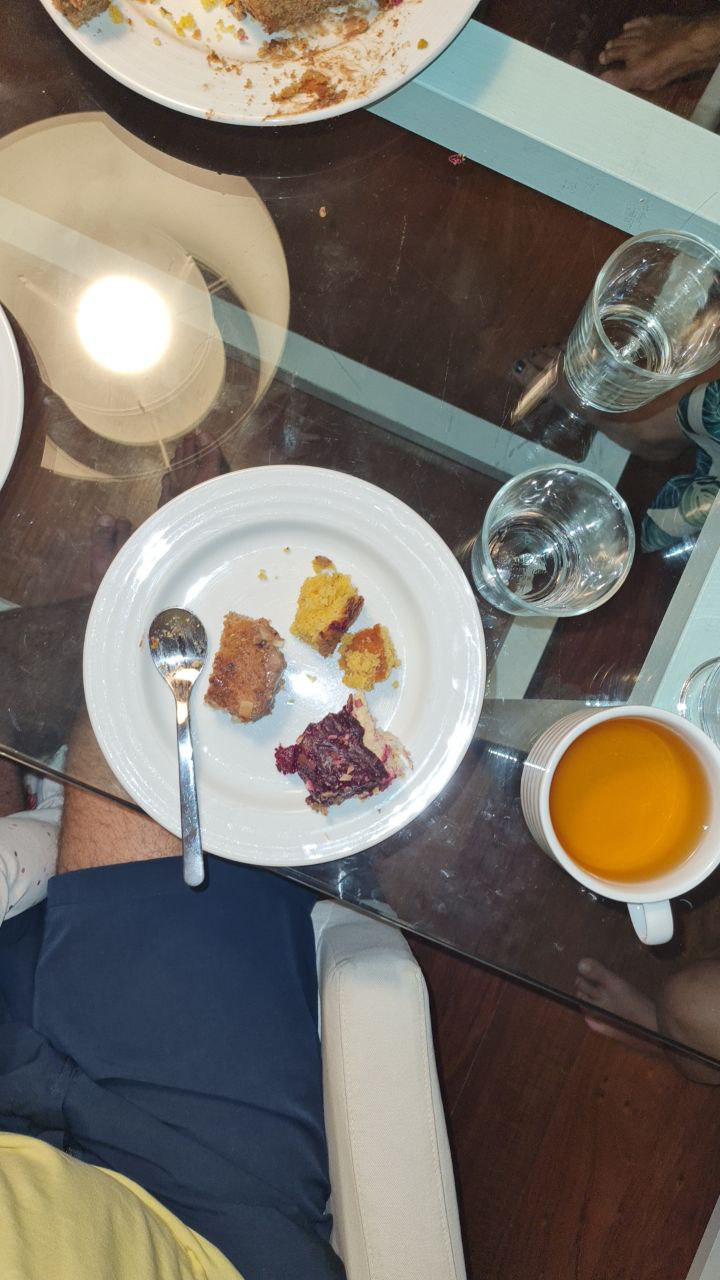

In [95]:
Image.open(reference_images_path/photo_id)

In [80]:
urls[0]

'https://dima.grankin.eu/fragment_reference_images/AgACAgIAAxkBAAILnGLvoNjgH3cZoMZlgvutCLpd31CpAAL0ujEb0nSAS-WGutwkFFzxAQADAgADeQADKQQ_9.jpg'

In [108]:
colors = ["white","lime","green","yellow","orange", "red","purple"],
values = [0,           1,     50,     100,     200,   300,     900]

In [109]:
import numpy as np

In [116]:
m = np.copy(masks[0])

In [130]:
m[m!=0] = 500

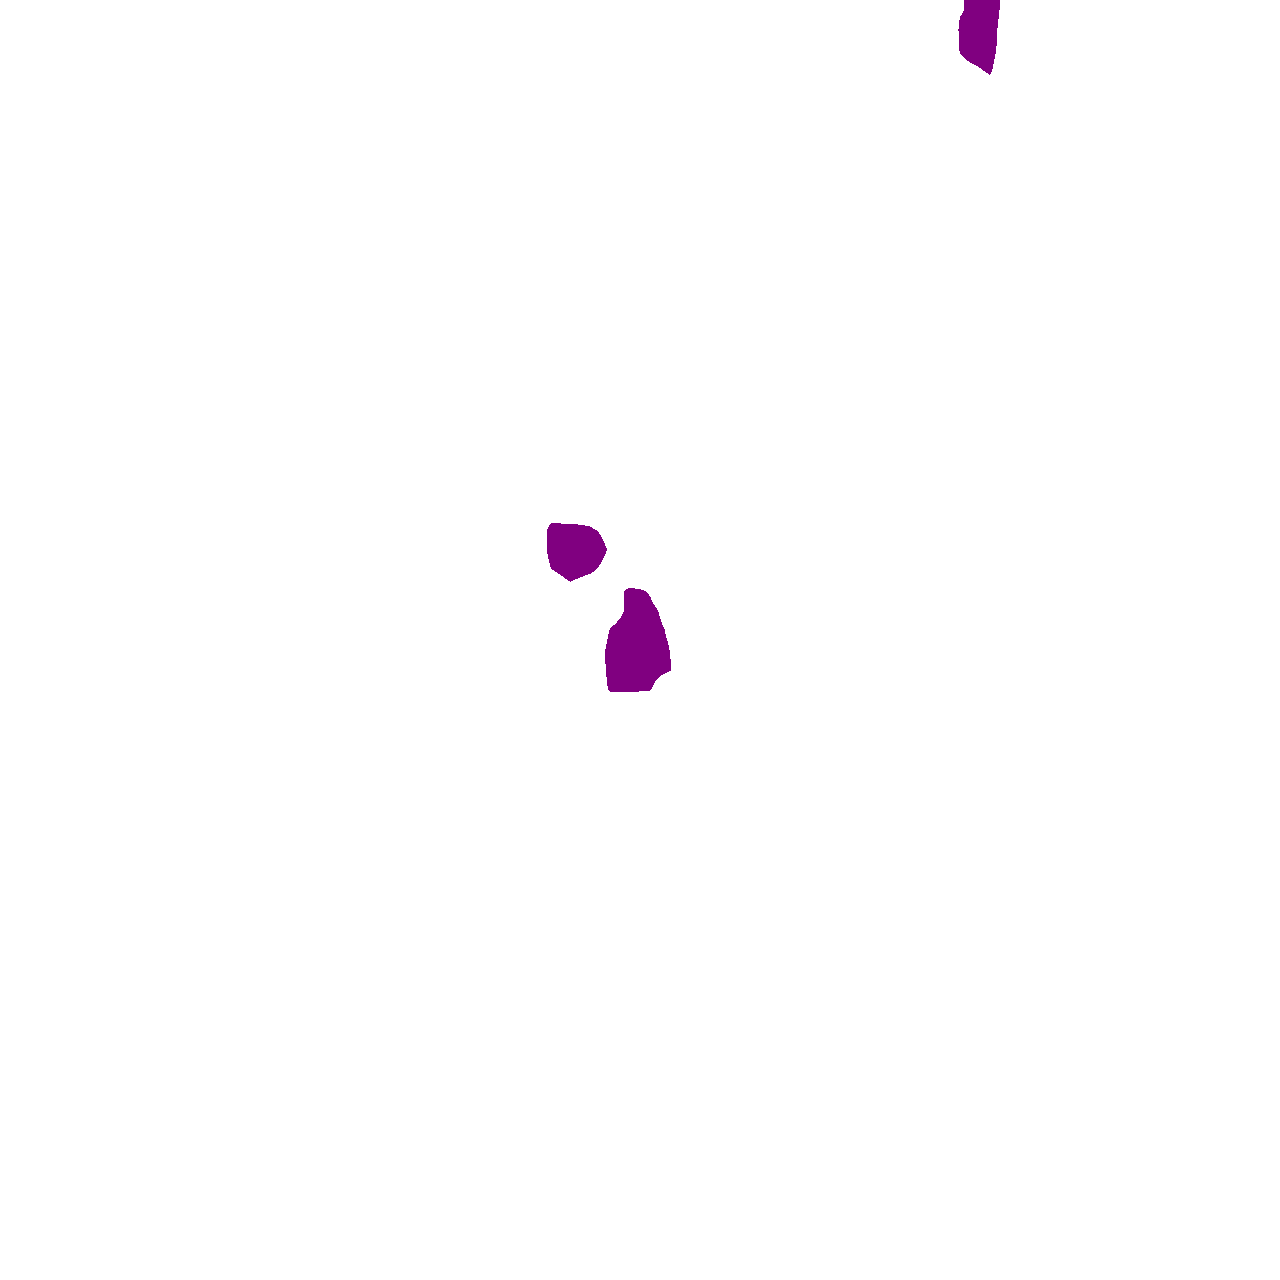

In [131]:
Image.fromarray(get_heatmap(m))